### A-Z Data Cleaning Guide
 - Welcome to this comprehensive guide on **Data cleaning**—the first and most crucial step in any data science or machine learning project. 

 - In this notebook, we will walk through **practical, hands-on techniques** to clean, preprocess, and prepare your dataset for powerful analytics and predictive modelling.

#### What You'll Learn:

✅ Identifying and handling missing values <br>
✅ Removing duplicates and fixing inconsistent types <br>
✅ Outlier treatment and visual validation <br>
✅ Encoding, scaling, and data transformation <br>
✅ Feature engineering tips to unlock hidden insights <br>

### Introduction: The Power of Data Cleaning
 - **Data cleaning** is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.
 - In the world of data science and machine learning, **data cleaning** is a critical first step. Raw data is often messy, inconsistent, incomplete, and noisy. Without cleaning, models may produce misleading or inaccurate results.



### Why is Data Cleaning Important?
 - Enhances data quality for analysis and modelling
 - Improves model accuracy and performance
 - Helps uncover patterns hidden in noise
 - Reduces bias and ensures reliable insights

### Let’s begin our journey toward clean and reliable data!

### About the Dataset: Ames Housing
The **Ames Housing dataset** contains detailed information on residential homes sold in Ames, Iowa, between 2006 and 2010. It is known for its rich feature set and real-world complexity, making it an excellent choice to demonstrate data cleaning techniques.

### Key Highlights:

 - 81 features per home sale record
 - A mix of **categorical**, **ordinal**, and **numerical** variables
 - Includes house characteristics, quality ratings, and sale prices
 - Contains missing values, outliers, and inconsistent entries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting display options for better readability
pd.set_option('display.max_columns', None)

# Loading the dataset
df = pd.read_csv('AmesHousing.csv')

In [3]:
# Displaying the first five rows
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
corr = df.corr(numeric_only = True)

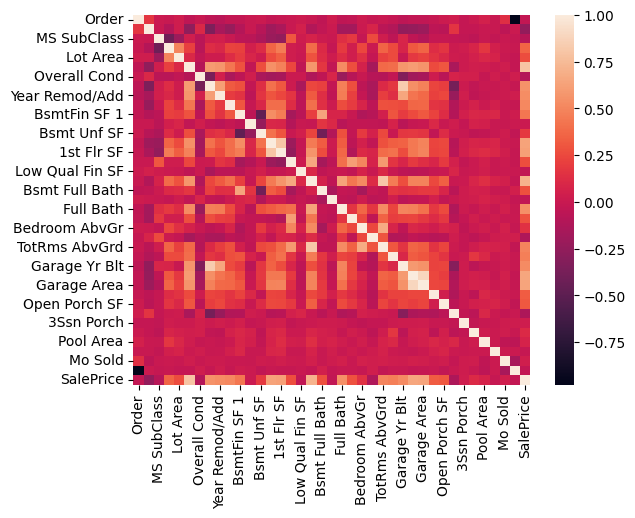

In [5]:
sns.heatmap(corr)
plt.show()

In [6]:
# Check the shape of the dataset
print(f" The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

 The dataset contains 2930 rows and 82 columns.


In [7]:
# View column types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [8]:
# Descriptive statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


### 1. Handling Missing Data

 - Missing data is one of the most common challenges in real-world datasets. Handling it effectively ensures your models are accurate and reliable.

### 🔍 Identifying Missing Values

In [9]:
# Total missing values per column
df.isnull().sum().sort_values(ascending = False).head(20)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Yr Blt      159
Garage Cond        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
dtype: int64

## Techniques to Handle Missing Data
### 1️⃣ Dropping Rows or Columns
Sometimes, the simplest way to handle missing data is to drop it—but only when it's safe to do so.

In [10]:
df_cleaned = df.dropna()

In [11]:
# Check the columns
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

### 2️⃣Fill with Mean / Median / Mode

In [12]:
# Numerical columns:
df_fill_with_mean = df['Lot Frontage'].fillna(df['Lot Frontage'].mean())
# The missing values of 'Lot Frontage' columns are replaced by the 'mean' value; you can check.

In [13]:
df_fill_with_mean.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2930 entries, 0 to 2929
Series name: Lot Frontage
Non-Null Count  Dtype  
--------------  -----  
2930 non-null   float64
dtypes: float64(1)
memory usage: 23.0 KB


In [14]:
# Numerical columns:
df_fill_with_median = df['Lot Frontage'].fillna(df['Lot Frontage'].median())
# The missing values of 'Lot Frontage' columns are replaced by the 'mean' value; you can check.

In [15]:
df_fill_with_median.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2930 entries, 0 to 2929
Series name: Lot Frontage
Non-Null Count  Dtype  
--------------  -----  
2930 non-null   float64
dtypes: float64(1)
memory usage: 23.0 KB


In [16]:
#Categorical columns:
df_fill_with_mode = df['Alley'].fillna(df['Alley'].mode()[0])
# The missing values of 'Alley' columns are replaced by the 'mode' value; you can check.

 - We use [0] because mode() returns a Series, and [0] selects the most frequent (first) 
value to replace missing values.

In [17]:
df_fill_with_mode.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2930 entries, 0 to 2929
Series name: Alley
Non-Null Count  Dtype 
--------------  ----- 
2930 non-null   object
dtypes: object(1)
memory usage: 23.0+ KB


### 3️⃣ Forward Fill 
 - Forward fill means missing values are replaced with the previous value

In [18]:
df_forward_fill = df.ffill()
# All the missing values are replaced; you can check.

In [19]:
df_forward_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2836 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

### 4️⃣ Backward Fill 
 - Backward fill means missing values are replaced with the next value.

In [20]:
df_backward_fill = df.bfill()
# All the missing values are replaced; you can check.

In [21]:
df_backward_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2877 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

### 5️⃣ Interpolation 
 - interpolate() means it fills missing values by using the values before and after to put a “middle” value.

In [22]:
df_interpolate = df['Lot Frontage'].interpolate()
# All the missing values are replaced; you can check.

In [23]:
df_interpolate.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2930 entries, 0 to 2929
Series name: Lot Frontage
Non-Null Count  Dtype  
--------------  -----  
2930 non-null   float64
dtypes: float64(1)
memory usage: 23.0 KB


### 6️⃣ KNN Imputation / SimpleImputer (from sklearn) 

In [24]:
df['Lot Frontage'].isnull().sum()

np.int64(490)

In [25]:
from sklearn.impute import SimpleImputer

# For numerical features
imp_mean = SimpleImputer(strategy='mean')
df_simple_array_mean = imp_mean.fit_transform(df[['Lot Frontage']])
# The missing values of 'Lot Frontage' columns are replaced by the 'mean' value; you can check. 
# Here we are using the scikit-learn (sklearn) library.

In [26]:
np.isnan(df_simple_array_mean).sum()
# Here we use np because SimpleImputer returns a NumPy array.
# And np.isnan() is used to check missing values in arrays.

np.int64(0)

In [27]:
# For numerical features
imp_median = SimpleImputer(strategy='median')
df_simple_array_median = imp_median.fit_transform(df[['Lot Frontage']])
# The missing values of 'Lot Frontage' columns are replaced by the 'median' value; you can check.

In [28]:
np.isnan(df_simple_array_mean).sum()
# Here we use np because SimpleImputer returns a NumPy array.
# And np.isnan() is used to check missing values in arrays.

np.int64(0)

In [29]:
#Categorical columns:
imp_mode = SimpleImputer(strategy='most_frequent')
df_simple_array_mode = imp_mode.fit_transform(df[['Alley']])
# The missing values of 'Lot Frontage' columns are replaced by the 'most frequent (mode)' value; you can check.

In [30]:
pd.isna(df_simple_array_mode).sum().sum()
# Here we use np because SimpleImputer returns a NumPy array.
# And np.isna() is used to check missing values in arrays.

np.int64(0)

In [31]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# For numerical features
df_knn_array = knn_imputer.fit_transform(df[['Lot Frontage']])
# The missing values of the 'Lot Frontage' column are replaced using KNN (5 nearest neighbours); you can check. 
# Here we are using the scikit-learn (sklearn) library.

In [32]:
np.isnan(df_knn_array).sum()
# Here we use np because SimpleImputer returns a NumPy array.
# And np.isnan() is used to check missing values in arrays.

np.int64(0)

#### Rules for Filling Missing Data:
 - `dropna`: when missing values are very few and removing rows/columns won’t affect data much.
 - `Mean`: numeric data, no major outliers, fairly symmetric distribution.
 - `Median`: numeric data with outliers or skewed distribution.
 - `Mode`: categorical data or the most frequent value.
 - `Forward fill (ffill)`: time-series/ordered data, use the previous value.
 - `Backward fill (bfill)`: time-series/ordered data, use the next value.
 - `SimpleImputer`: to apply mean/median/mode cleanly across columns in ML pipelines.
 - `KNNImputer`: This method is used when missing values depend on similar rows in numeric data; it provides more accurate results but is slower.

**The most commonly** used are **mean/median/mode** (quick & simple), and in **ML pipelines**, **SimpleImputer** is used a lot; **KNNImputer** is used **less** often because it’s slower, but it’s helpful when values depend on similar **rows/features**.

### 2. Handling Duplicates
- Duplicate records can mislead your analysis, inflate feature importance, and bias model outcomes. Removing them ensures your dataset is accurate and clean.

#### Detecting Duplicate Rows
 - The `df.duplicated()` method returns a `Boolean Series` indicating whether a row is a duplicate of a previous one.
Adding `.sum()` gives the total count of duplicate rows.

In [33]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

#### 🔍 Detecting Duplicate Rows
drop_duplicates() removes all duplicated rows, keeping the first occurrence by default.

In [34]:
# Drop duplicates. Use the subset attribute to drop duplicates based on specific columns
df = df.drop_duplicates()

**Note**:

To clearly demonstrate each data cleaning step, I intentionally did not modify the main DataFrame (df).
If the original data were altered early on, it would not be possible to showcase multiple cleaning techniques step by step.